# K-Nearest Neighbour (KNN) Algorithm from Scratch
## Multi Classification

#### Author: Markus Ullenbruch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 1. The Algorithm

In [2]:
class KNNClassification:
    def __init__(self, k):
        self.k = k
        self.data = None
        
    def fit(self, X, y):
        self.data = X
        self.label = y
        self.set = list(set(y))
    
    def predict(self, newdata):
        pred = []
        for sample in newdata:
            
            # calculate distances and save distance and corresponding label
            distance_label = []
            for sample_train, label in zip(self.data, self.label):
                d = np.linalg.norm(sample - sample_train)
                distance_label.append((d, label))
            
            # sortieren nach distance ascending
            distance_label.sort(key=lambda tup: tup[0])
            
            # Pick k nearest neighbours
            distance_label = distance_label[0:self.k]
            
            unique_counts = {}
            for label in self.set:
                unique_counts[label] = 0
            
            for _, klasse in distance_label:
                unique_counts[klasse] += 1
            
            most_class = max(unique_counts, key=unique_counts.get)
            pred.append(most_class)
        return np.vstack(pred)
            

<img src="PseudoCode.jpg" alt="Drawing" style="width: 700px;"/>

## 2. Test Classification Data

In [3]:
# Generate artificial Training Data

def make_cluster(mu, sigma):
    x = np.random.normal(mu, sigma, size=100)
    y = np.random.normal(mu, sigma, size=100)
    return x, y

x1, y1 = make_cluster(5, 3)
label1 = np.zeros(shape=x1.shape[0])

x2, y2 = make_cluster(10, 3)
label2 = np.ones(shape=x2.shape[0])

x3, y3 = make_cluster(15, 3)
label3 = 2*np.ones(shape=x3.shape[0])

x = np.concatenate((x1, x2, x3))
y = np.concatenate((y1, y2, y3))
X = np.array([x, y]).transpose()  # Make Dataset
labels = np.concatenate((label1, label2, label3)).astype(int)

print(X.shape)
print(labels.shape)

(300, 2)
(300,)


### Predictions on Training Data

In [4]:
# Make Predictions
testpunkt = X

knn = KNNClassification(k=4)
knn.fit(X, labels)
preds = knn.predict(testpunkt)

In [5]:
X.shape

(300, 2)

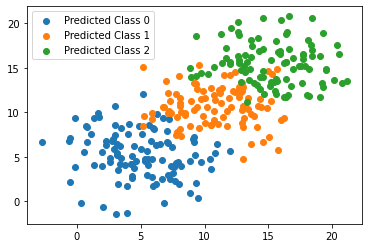

In [6]:
for class_val in [0, 1, 2]:
    x, y = X[np.where(preds==class_val)[0], 0], X[np.where(preds==class_val)[0], 1]
    plt.scatter(x, y, label='Predicted Class ' + str(class_val))
    plt.legend()
plt.show()

### Training Data

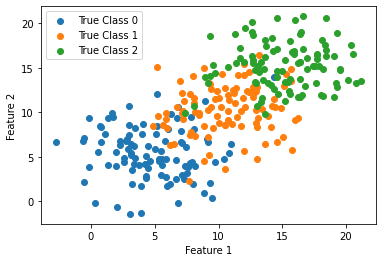

In [7]:
plt.scatter(x1, y1, label='True Class 0')
plt.scatter(x2, y2, label='True Class 1')
plt.scatter(x3, y3, label='True Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()